In [1]:
file_path = "bremen_subgraph_100.gr"

def read_gr_file(file_path):
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith('c'):
                continue  # Ignore comment lines
            
            if line.startswith('p'):
                parts = line.split()
                if len(parts) != 4 or parts[1] != 'ds':
                    raise ValueError("Invalid problem descriptor in .gr file")
                # We can extract n (vertices) and m (edges) if needed
                n, m = int(parts[2]), int(parts[3])
                continue
            
            parts = line.split()
            if len(parts) == 2:
                try:
                    u, v = int(parts[0]), int(parts[1])
                    edges.append((u, v))
                except ValueError:
                    raise ValueError(f"Invalid edge definition: {line}")
    
    return edges

edges = read_gr_file(file_path)

print(edges)

[(1, 2), (1, 11), (1, 35), (2, 3), (2, 32), (3, 4), (3, 29), (4, 5), (4, 26), (5, 6), (5, 20), (6, 7), (6, 15), (7, 8), (7, 23), (8, 9), (8, 18), (9, 10), (9, 14), (10, 14), (11, 12), (11, 32), (11, 66), (12, 13), (12, 33), (12, 68), (13, 55), (13, 59), (14, 18), (15, 16), (15, 20), (15, 23), (16, 17), (16, 21), (16, 24), (17, 22), (17, 25), (18, 19), (18, 23), (19, 24), (20, 21), (20, 26), (21, 22), (21, 27), (22, 28), (23, 24), (24, 25), (26, 27), (26, 29), (27, 28), (27, 30), (28, 75), (29, 30), (29, 32), (30, 31), (30, 33), (31, 34), (31, 75), (32, 33), (33, 34), (35, 43), (35, 66), (36, 42), (36, 94), (36, 109), (36, 90), (37, 39), (37, 40), (37, 107), (37, 77), (38, 88), (38, 98), (39, 47), (39, 82), (40, 100), (40, 108), (40, 76), (41, 42), (41, 100), (41, 109), (41, 68), (42, 43), (42, 66), (43, 90), (44, 89), (44, 45), (44, 53), (44, 103), (45, 92), (45, 46), (45, 94), (46, 84), (46, 93), (47, 106), (48, 50), (48, 81), (49, 91), (49, 80), (50, 83), (51, 52), (51, 64), (52, 56)

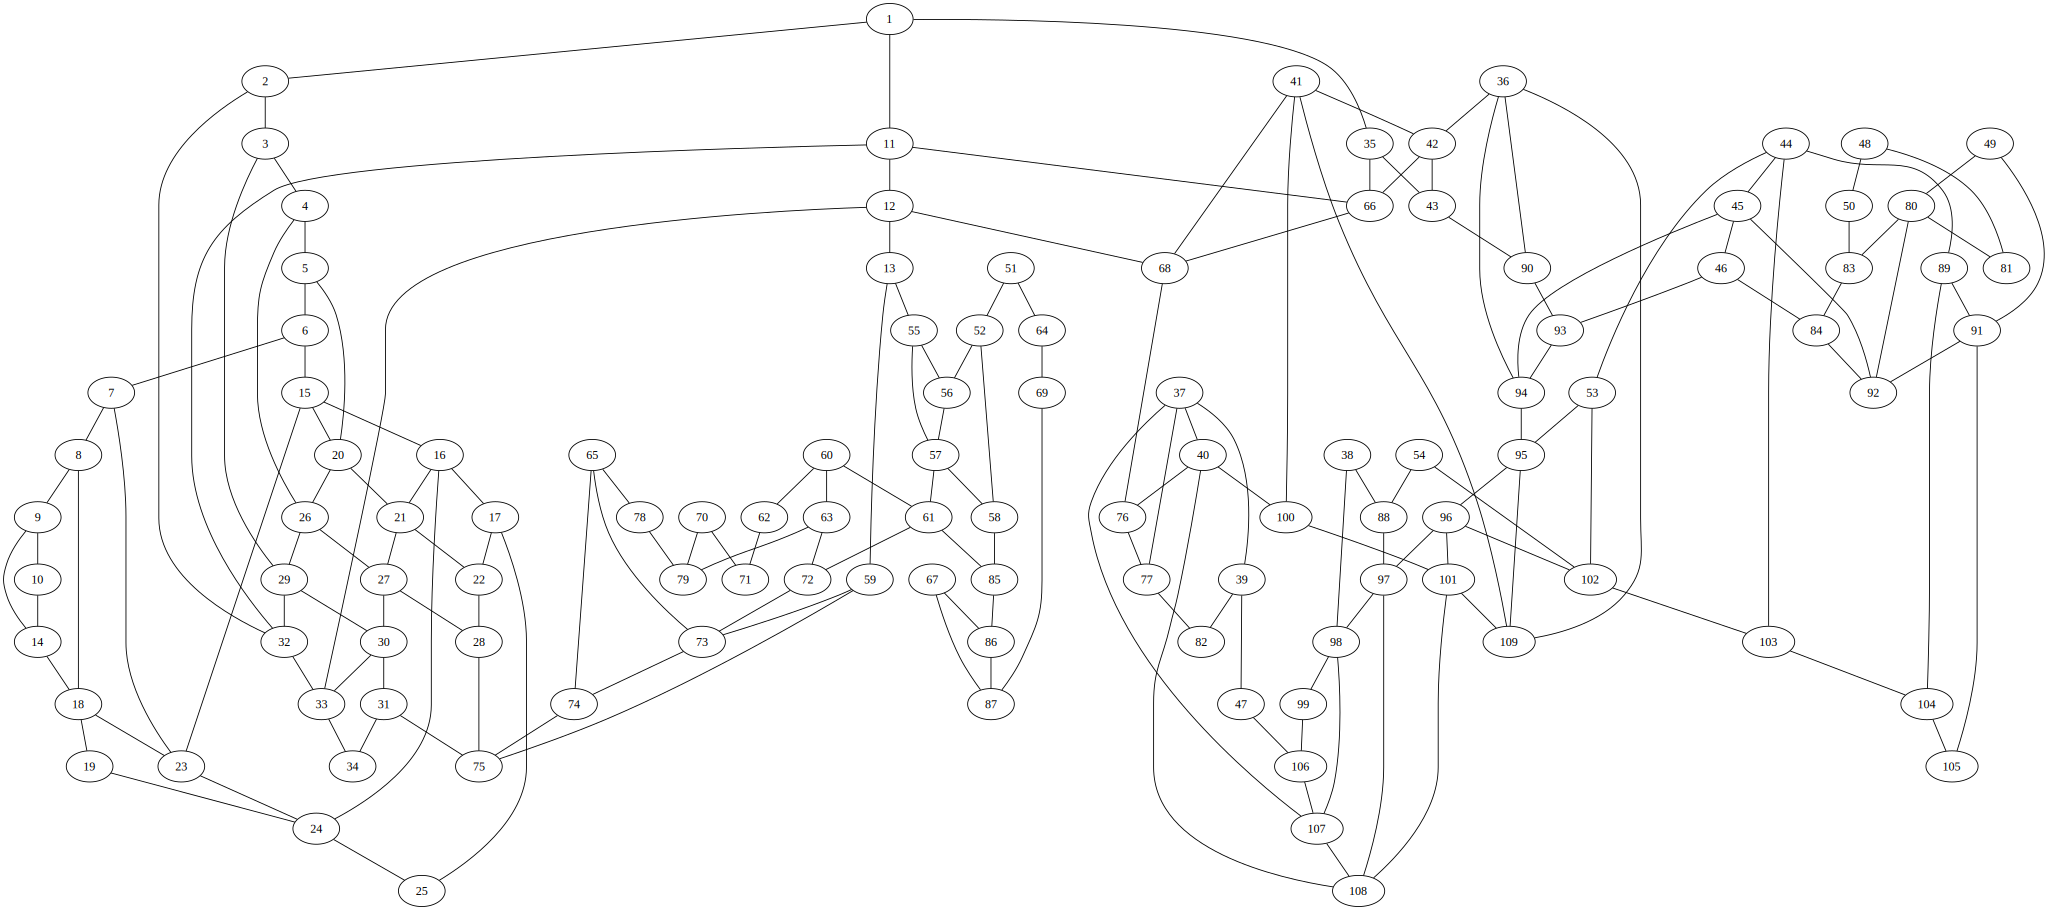

In [4]:
import graphviz

g = graphviz.Graph('G')
for (i,j) in edges:
    g.edge(str(i),str(j))

g